Chapter 18
# 可视化椭球
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 定义函数

In [2]:


def plot_implicit_V(fn,V, azimuth, elevation, xlabel, ylabel, zlabel, bbox=(-2.5,2.5)):

    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    width = bbox[1]
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')
    A = np.linspace(xmin, xmax, 200) 
    B = np.linspace(xmin, xmax, 25) 
    A1,A2 = np.meshgrid(A,A) 

    for z in B: 
        X,Y = A1,A2
        Z = fn(X,Y,z)
        ax.contour(X, Y, Z+z, [z], zdir='z', 
                  colors = [[0.5, 0.5, 0.5]],
                  linestyle = '-')

    for y in B: 
        X,Z = A1,A2
        Y = fn(X,y,Z)
        ax.contour(X, Y+y, Z, [y], zdir='y', 
                  colors = [[0.5, 0.5, 0.5]],
                  linestyle = '-')

    for x in B: 
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        ax.contour(X+x, Y, Z, [x], zdir='x', 
                  colors = [[0.5, 0.5, 0.5]],
                  linestyle = '-')

    colors = ['b', 'r', 'g']
    
    # 增加三个箭头，表示椭球的三个主轴
    for i in np.arange(0,3):
        
        vector = V[:,i]
        v = np.array([vector[0],vector[1],vector[2]])
        vlength=np.linalg.norm(v)
        ax.quiver(0,0,0,vector[0],vector[1],vector[2],
                length=vlength, color = colors[i])
    
    x, y, z = np.array([[-width,0,0],[0,-width,0],[0,0,-width]])
    u, v, w = np.array([[2*width,0,0],[0,2*width,0],[0,0,2*width]])
    ax.quiver(x,y,z,u,v,w,
              arrow_length_ratio=0, color="black")


    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.view_init(azim = azimuth, elev = elevation)
    ax.set_box_aspect([1,1,1]) 
    ax.set_proj_type('ortho')
    
    fig.savefig('Figures/几何体投影_azimuth_' + str(azimuth) +
                '_elevation_' + str(elevation) + '.svg', format='svg')
    

### 处理数据

In [3]:
# 导入鸢尾花数据
iris_sns = sns.load_dataset("iris") 
# A copy from Seaborn
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)
SIGMA_all = X_df.cov().to_numpy()
# 计算协方差矩阵

SIGMA = SIGMA_all[0:3,0:3]
# 提取前三个特征的协方差矩阵

def cov_ellipsoid(x,y,z):
    
    f = [[x, y, z]] @ np.linalg.inv(SIGMA) @ [[x], [y], [z]]
    # 马氏距离为1的椭球
    
    return f[0,0] - 1

Lambda,V = np.linalg.eig(SIGMA)

C:\Users\james\AppData\Local\Temp\ipykernel_12548\2126825650.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.inv(SIGMA) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py

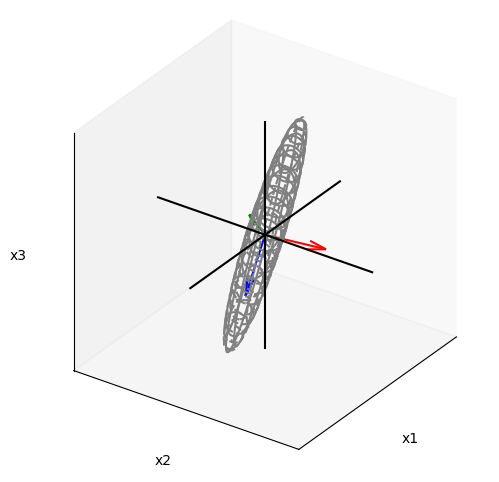

In [4]:
plot_implicit_V(cov_ellipsoid, V, 
                -145, 30, 
                'x1','x2','x3',
                bbox=(-2.,2.))

C:\Users\james\AppData\Local\Temp\ipykernel_12548\2126825650.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.inv(SIGMA) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py

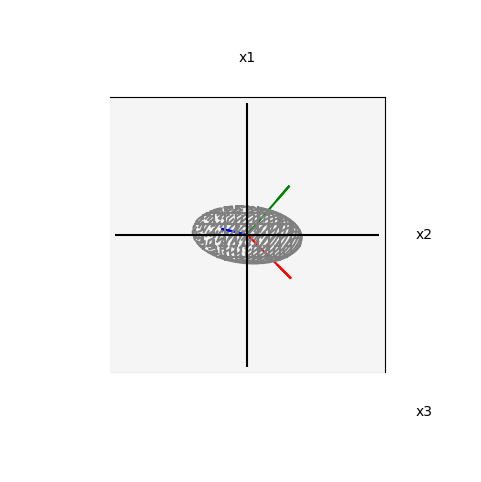

In [5]:
plot_implicit_V(cov_ellipsoid, V, 
                -90, 90, 
                'x1','x2','x3',
                bbox=(-2.,2.)) # x1-x2

C:\Users\james\AppData\Local\Temp\ipykernel_12548\2126825650.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.inv(SIGMA) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py

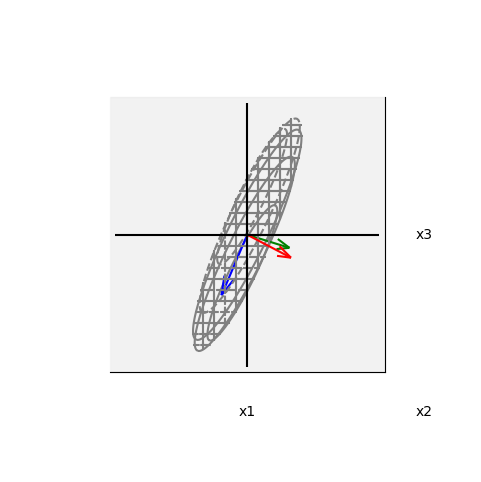

In [6]:
plot_implicit_V(cov_ellipsoid, V, 
                -90, 0, 
                'x1','x2','x3',
                bbox=(-2.,2.)) # x1-x3

C:\Users\james\AppData\Local\Temp\ipykernel_12548\2126825650.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.inv(SIGMA) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py

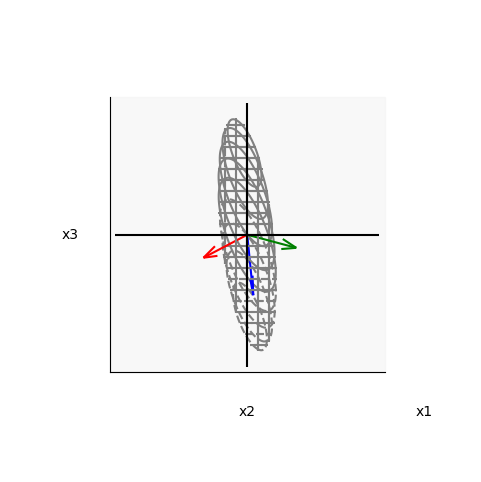

In [7]:
plot_implicit_V(cov_ellipsoid, V, 
                0, 0, 
                'x1','x2','x3',
                bbox=(-2.,2.)) # x2-x3

### 正椭球  
利用特征值分解得到正椭球的主轴长度

In [8]:
Lambda,V = np.linalg.eig(SIGMA)

In [15]:
Lambda

array([3.69111979, 0.05945372, 0.24137727])

In [16]:
SIGMA_Z = np.diag(Lambda)
SIGMA_Z

array([[3.69111979, 0.        , 0.        ],
       [0.        , 0.05945372, 0.        ],
       [0.        , 0.        , 0.24137727]])

In [12]:
def cov_ellipsoid_orthg(x,y,z):
    
    f = [[x, y, z]] @ np.linalg.inv(SIGMA_Z) @ [[x], [y], [z]]
    # 马氏距离为1的正椭球
    
    return f[0,0] - 1

C:\Users\james\AppData\Local\Temp\ipykernel_12548\2688771455.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.inv(SIGMA_Z) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.p

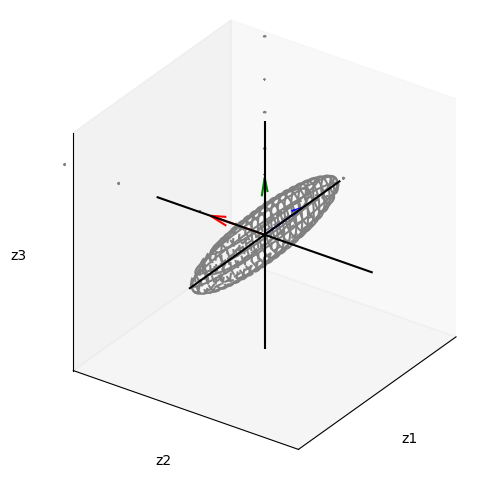

In [17]:
plot_implicit_V(cov_ellipsoid_orthg, np.identity(3), 
                -145, 30, 
                'z1','z2','z3',
                bbox=(-2.,2.))

# np.identity(3)，产生 3 * 3 单位矩阵，这是旋转后正椭球的主轴所在方向

C:\Users\james\AppData\Local\Temp\ipykernel_12548\2688771455.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.inv(SIGMA_Z) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.p

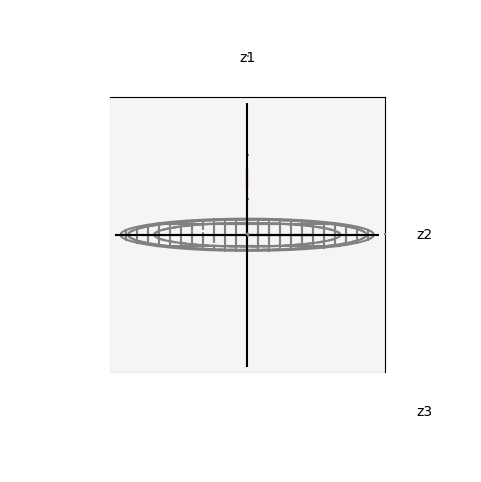

In [18]:
plot_implicit_V(cov_ellipsoid_orthg, np.identity(3), 
                -90, 90, 
                'z1','z2','z3',
                bbox=(-2.,2.)) # z1-z2

C:\Users\james\AppData\Local\Temp\ipykernel_12548\2688771455.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.inv(SIGMA_Z) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.p

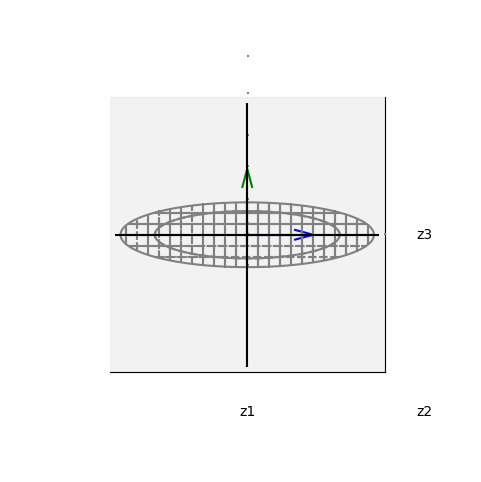

In [19]:
plot_implicit_V(cov_ellipsoid_orthg, np.identity(3), 
                -90, 0, 
                'z1','z2','z3',
                bbox=(-2.,2.)) # z1-z3

C:\Users\james\AppData\Local\Temp\ipykernel_12548\2688771455.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f = [[x, y, z]] @ np.linalg.inv(SIGMA_Z) @ [[x], [y], [z]]
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.py:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y',
C:\Users\james\AppData\Local\Temp\ipykernel_12548\1783882722.p

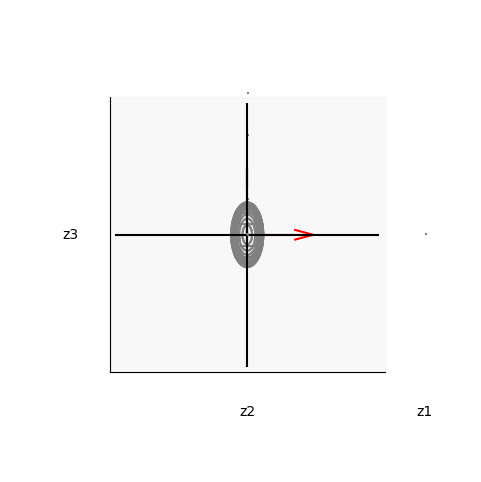

In [20]:
plot_implicit_V(cov_ellipsoid_orthg, np.identity(3), 
                0, 0, 
                'z1','z2','z3',
                bbox=(-2.,2.)) # z2-z3

In [9]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023